In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
data = pd.read_csv('../../data/raw/heart_attack_prediction_dataset.csv')

In [ ]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### check the overall details about the dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [15]:
data.shape

(8763, 26)

In [16]:
data.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

### check if there are missing values

In [13]:
data.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

### check if there are duplicate values

In [14]:
data.loc[data.duplicated()]

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk


### Exploratory Data Analysis (EDA)

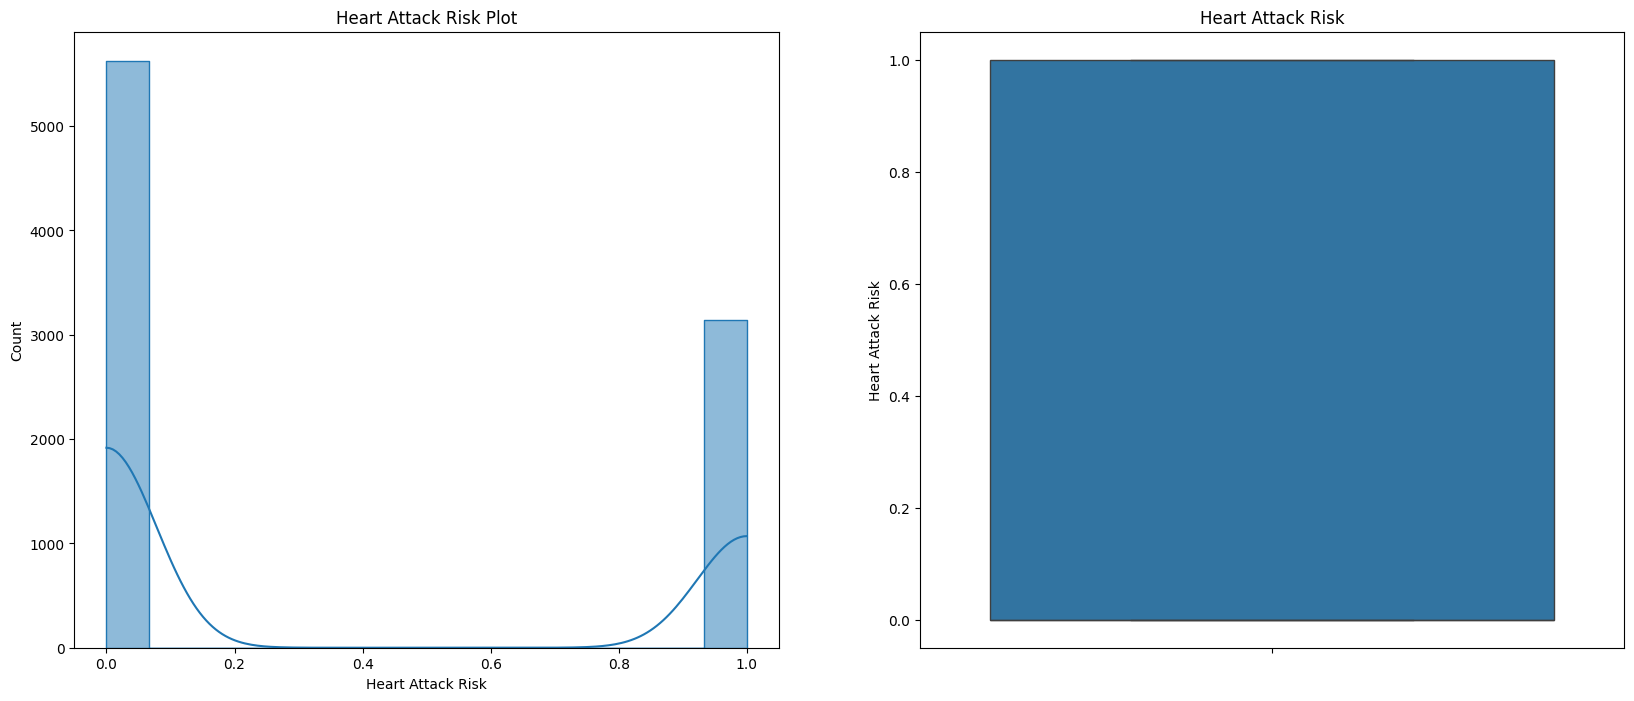

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Heart Attack Risk Plot')
sns.histplot(data["Heart Attack Risk"], kde=True, element='step')

plt.subplot(1,2,2)
sns.boxplot(data["Heart Attack Risk"])
plt.title('Heart Attack Risk')

plt.show()

### Visualizing categorical variable

In [19]:
categorical_features = [x for x in data.columns if data[x].dtype =='object']

In [20]:
categorical_features

['Patient ID',
 'Sex',
 'Blood Pressure',
 'Diet',
 'Country',
 'Continent',
 'Hemisphere']

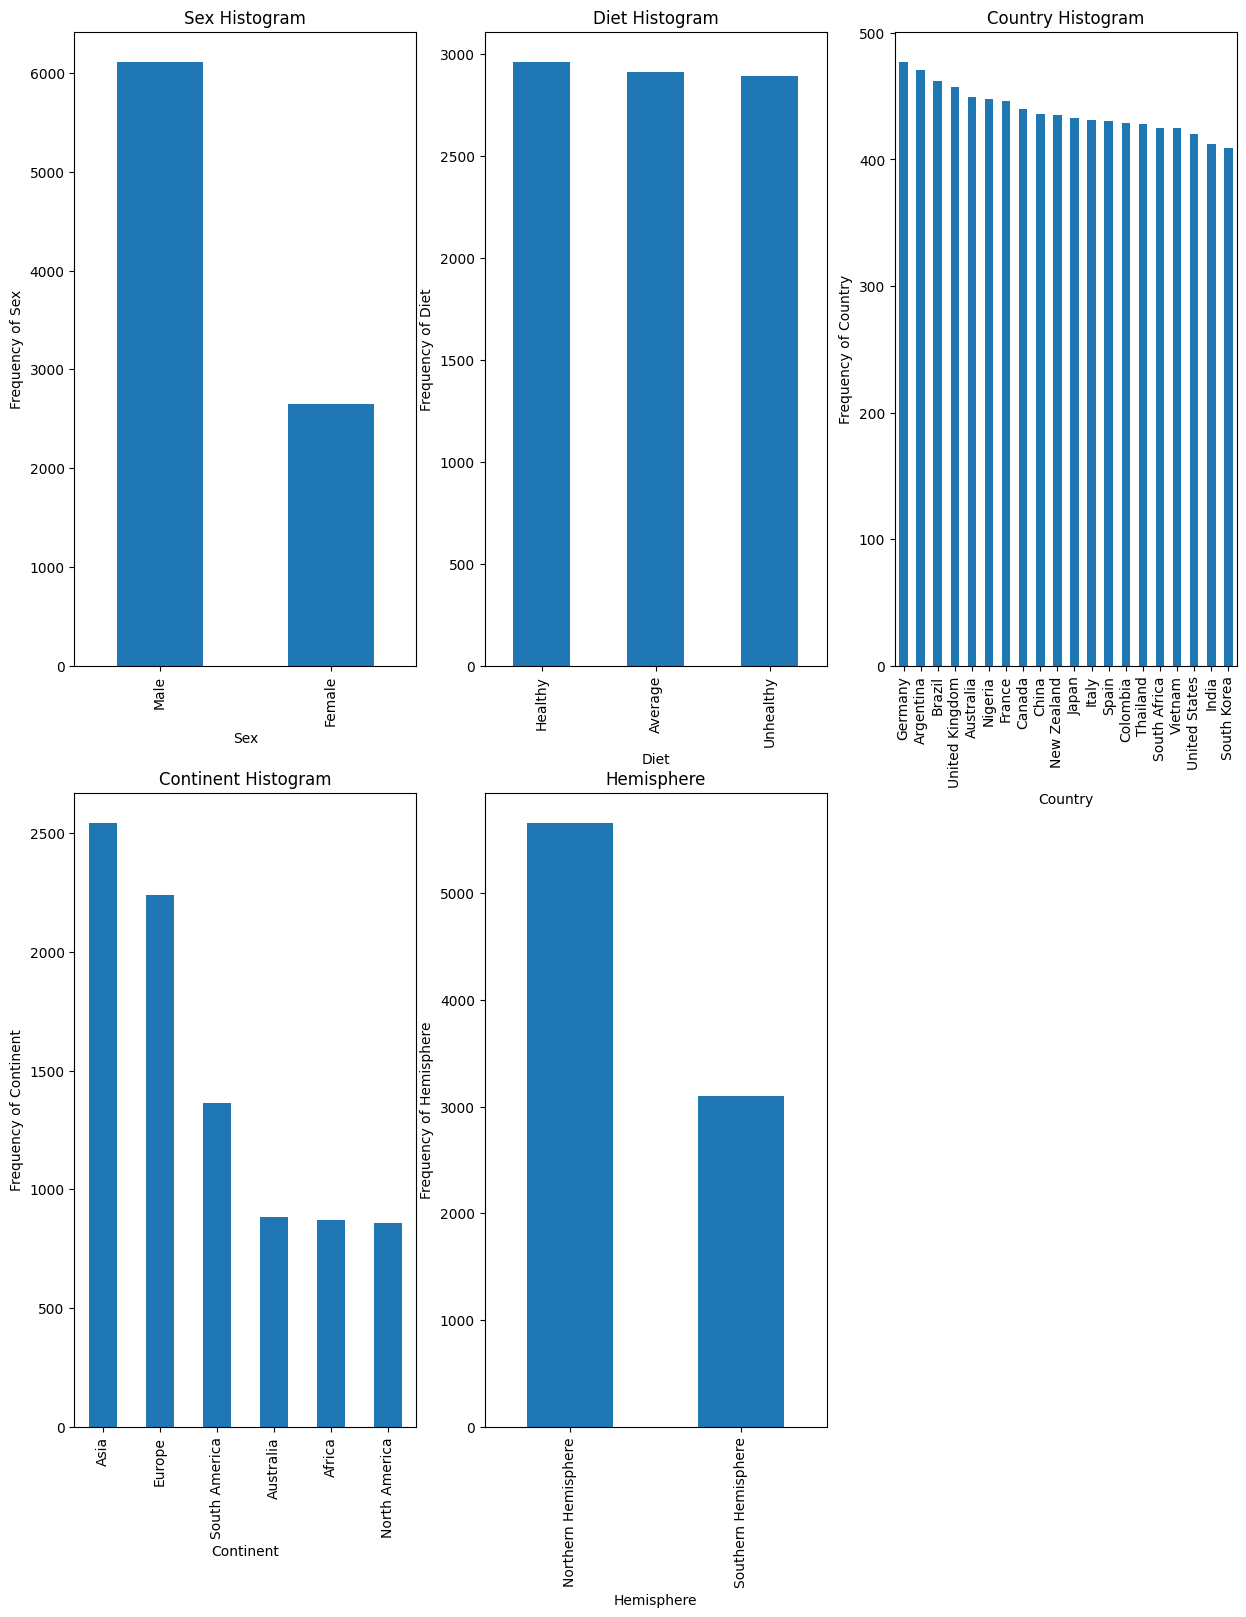

In [21]:
plt.figure(figsize=(15, 28))

plt.subplot(3, 3, 1)
plt1 = data['Sex'].value_counts().plot(kind='bar')
plt.title('Sex Histogram')
plt1.set(xlabel = 'Sex', ylabel='Frequency of Sex')

plt.subplot(3, 3, 2)
plt1 = data['Diet'].value_counts().plot(kind='bar')
plt.title('Diet Histogram')
plt1.set(xlabel = 'Diet', ylabel='Frequency of Diet')

plt.subplot(3, 3, 3)
plt1 = data['Country'].value_counts().plot(kind='bar')
plt.title('Country Histogram')
plt1.set(xlabel = 'Country', ylabel='Frequency of Country')

plt.subplot(3, 3, 4)
plt1 = data['Continent'].value_counts().plot(kind='bar')
plt.title('Continent Histogram')
plt1.set(xlabel = 'Continent', ylabel='Frequency of Continent')

plt.subplot(3, 3, 5)
plt1 = data['Hemisphere'].value_counts().plot(kind='bar')
plt.title('Hemisphere')
plt1.set(xlabel = 'Hemisphere', ylabel='Frequency of Hemisphere')

plt.show()

### Visualising Numerical Features

In [22]:
numerical_features = [x for x in data.columns if data[x].dtype in ('int64','float64')]
print(numerical_features)

['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']


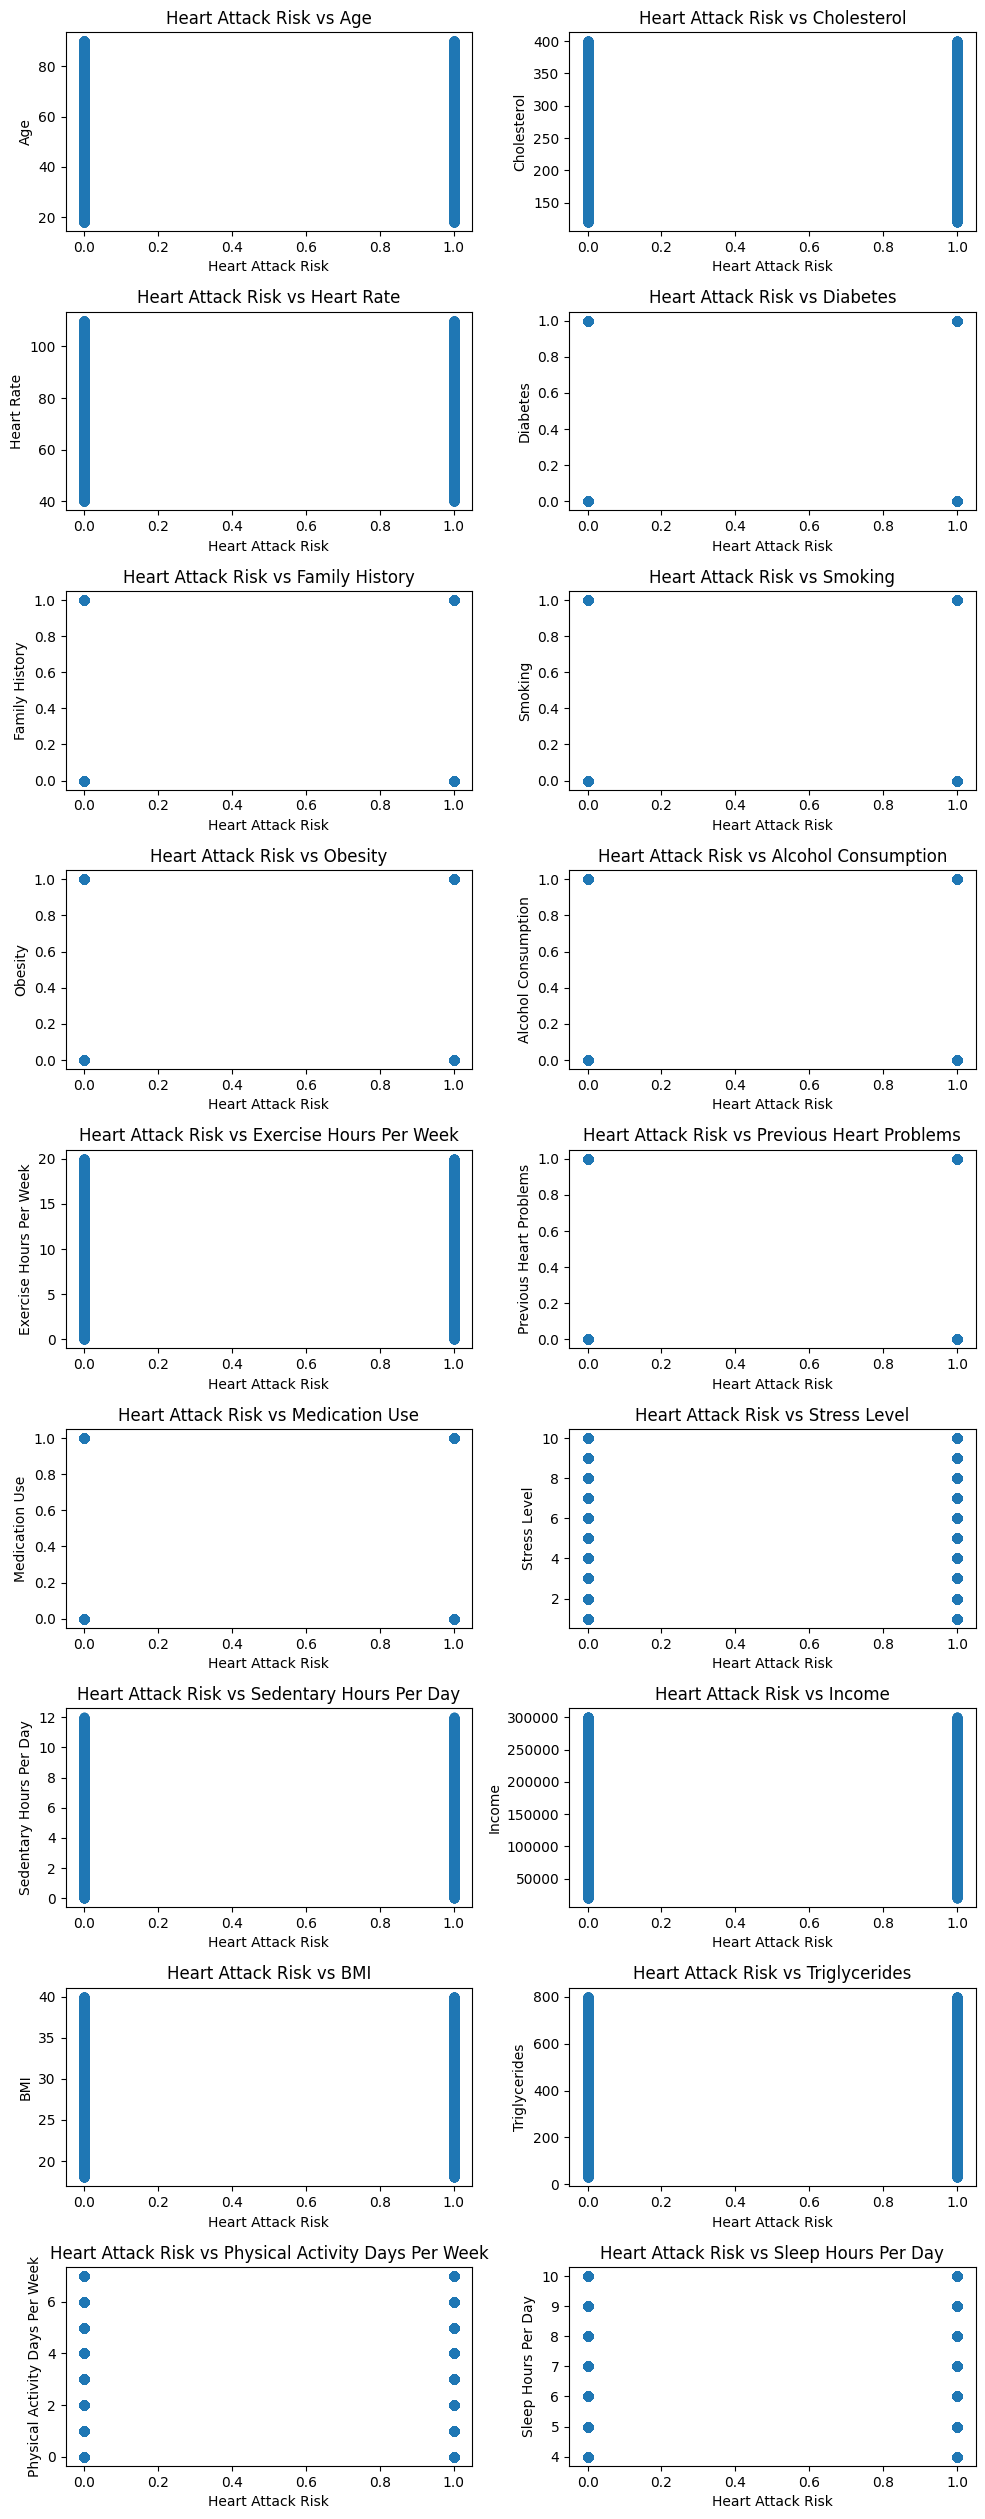

In [23]:
def scatter(y,fig):
    plt.subplot(18,2,fig)
    plt.scatter(data['Heart Attack Risk'],data[y])
    plt.title('Heart Attack Risk vs '+y)
    plt.ylabel(y)
    plt.xlabel('Heart Attack Risk')

plt.figure(figsize=(10,50))

scatter('Age', 1)
scatter('Cholesterol', 2)
scatter('Heart Rate', 3)
scatter('Diabetes', 4)
scatter('Family History', 5)
scatter('Smoking',6)
scatter('Obesity',7)
scatter('Alcohol Consumption',8)
scatter('Exercise Hours Per Week',9)
scatter('Previous Heart Problems',10)
scatter('Medication Use',11)
scatter('Stress Level',12)
scatter('Sedentary Hours Per Day',13)
scatter('Income',14)
scatter('BMI',15)
scatter('Triglycerides',16)
scatter('Physical Activity Days Per Week',17)
scatter('Sleep Hours Per Day',18)

plt.tight_layout()

### Correlation Heatmap

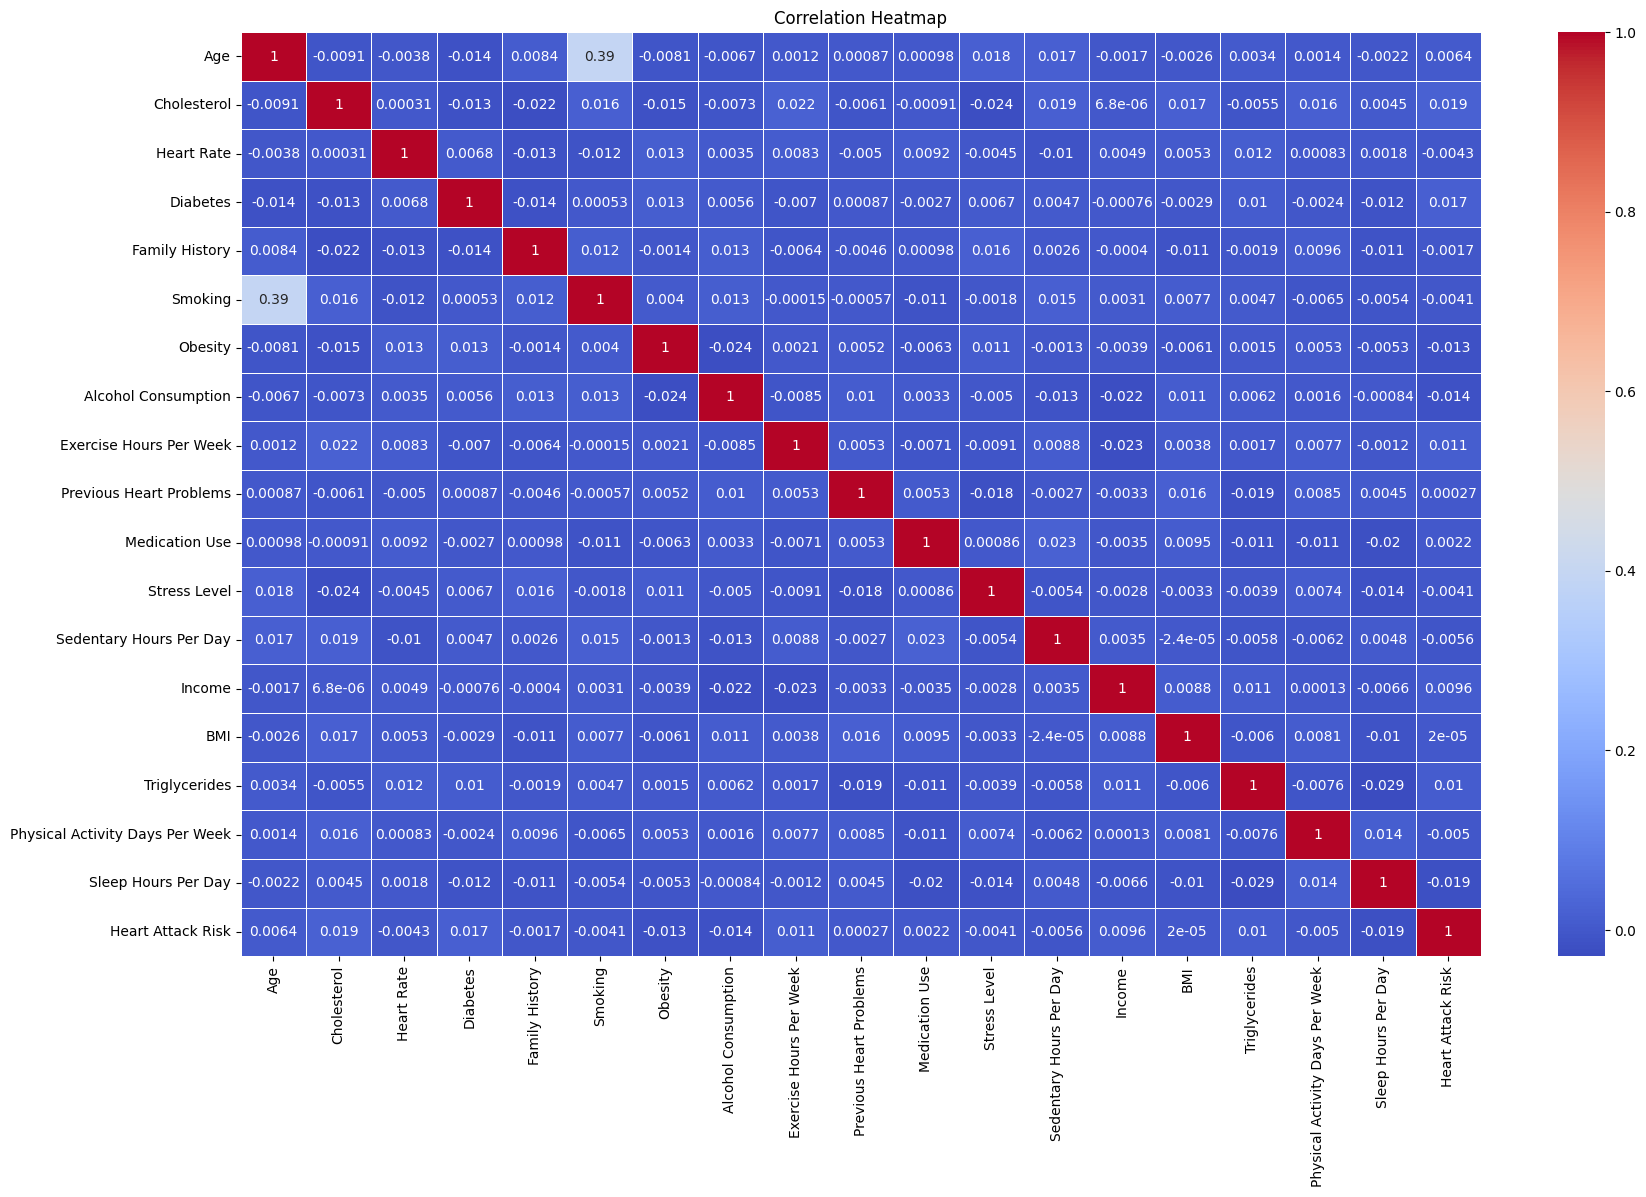

In [26]:
cor_matrix= data[numerical_features].corr()
plt.figure(figsize=(20, 12))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Handle categorical features

In [32]:
categorical_features

['Patient ID',
 'Sex',
 'Blood Pressure',
 'Diet',
 'Country',
 'Continent',
 'Hemisphere']

In [70]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()

In [75]:
data['Blood Pressure'] = data['Blood Pressure'].astype(str)
bp_split = data['Blood Pressure'].str.split('/', expand=True)

In [77]:
data['Systolic_BP'] = pd.to_numeric(bp_split.iloc[:, 0], errors='coerce')
data['Diastolic_BP'] = pd.to_numeric(bp_split.iloc[:, 1], errors='coerce')

In [78]:
data.drop(columns=['Blood Pressure'], inplace=True)
data[['Systolic_BP', 'Diastolic_BP']].head()

,Systolic_BP,Diastolic_BP
0,158,88
1,165,93
2,174,99
3,163,100
4,91,88


In [79]:
# Encode Sex 
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Encode Diet 
data['Diet'] = label_encoder.fit_transform(data['Diet'])

In [80]:
data[['Sex', 'Diet']].head()

,Sex,Diet
0,1,0
1,1,2
2,0,1
3,1,0
4,1,2


#### Drop Unnecessary Columns

In [82]:
data.drop(columns=['Patient ID'], inplace=True)
data.drop(columns=['Country', 'Continent', 'Hemisphere'], inplace=True)

In [83]:
data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic_BP,Diastolic_BP
0,67,1,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


In [88]:
data.dtypes

Age                                  int64
Sex                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
Systolic_BP                          int64
Diastolic_BP                         int64
dtype: obje

In [90]:
data.to_csv('heart_attack_data_cleaned.csv', index=False)